In [79]:
import numpy as np
import matplotlib.pyplot as plt
from stamptools.analysis import PBC_distance

In [9]:
# plots global parameters
plt.rcParams["figure.dpi"] = 100
plt.rcParams['figure.figsize'] = [9, 6]

In [72]:
def distance(v1, v2, box):
    q = []
    for i in range(len(box)):
        dq = abs(v1[i] - v2[i])
        q.append(min(dq, abs(box[i] - dq)))
        
    return np.linalg.norm(q)

def area(r):
    return np.pi * r**2

In [62]:
L = 3.0  # nm
BOX = np.array([L, L])
Nparticle = 1000

x = np.random.rand(Nparticle) * L
y = np.random.rand(Nparticle) * L

coord = np.array([x, y]).T

traj = [coord]

Area_total = np.prod(BOX)
Area_per_particle = Area_total / Nparticle

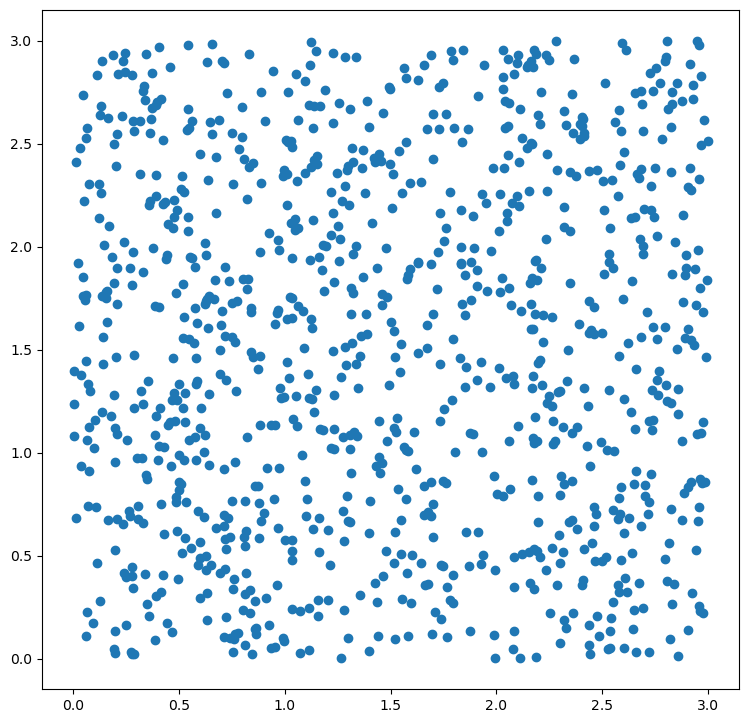

In [51]:
fig, ax = plt.subplots(figsize=(9, 9))

ax.scatter(x, y, marker="o")

In [47]:
for i in range(len(coord)):
    print(distance(coord[i, :], coord[1, :], BOX))

1.638587385481868
0.0
1.4431398492214338
1.6858987442280475
1.8086730770789308
1.6124027119123592
1.6809385741818643
0.6461496950645154
1.9303039464843095
2.004208627089729
0.5118230842178
0.6594442582084221
2.438433527423954
0.8648963695590939
0.5521224119452641
1.968941768784304
0.7947497657795807
1.667194752777604
1.7152599062442693
2.251783126699576
2.1546677652931674
1.7489637995573257
1.148548629652626
0.9767050398864883
1.4852422962732854
1.8872560297854089
1.7735559962301235
0.5675072373787896
1.4246017306518832
1.0178579125775058
1.856489951469133
1.975219793976935
1.1139048537401093
1.6289634304823915
0.644021750238568
1.3063368415276375
2.020738526302359
1.6856164261538336
2.7231060450938176
1.9593700678346104
2.2810707355848288
0.6777832799144676
1.1363021629692185
1.0852138791298043
0.7662375875638868
2.05899789365317
0.8692010309307546
1.7519486394388697
0.547128089993623
2.3771850366909772
1.970020670912202
2.2077009893137927
2.522074598946594
0.694438190528364
0.4056292

In [53]:
rmin = 0.0
rmax = 3.0
binwidth = 0.002
bins = np.arange(rmin, rmax + binwidth, binwidth)

In [54]:
# vshell = 4 * np.pi * ((binwidth + bins)**3 - bins**3) / 3
dA = np.pi * ((binwidth + bins)**2 - bins**2)

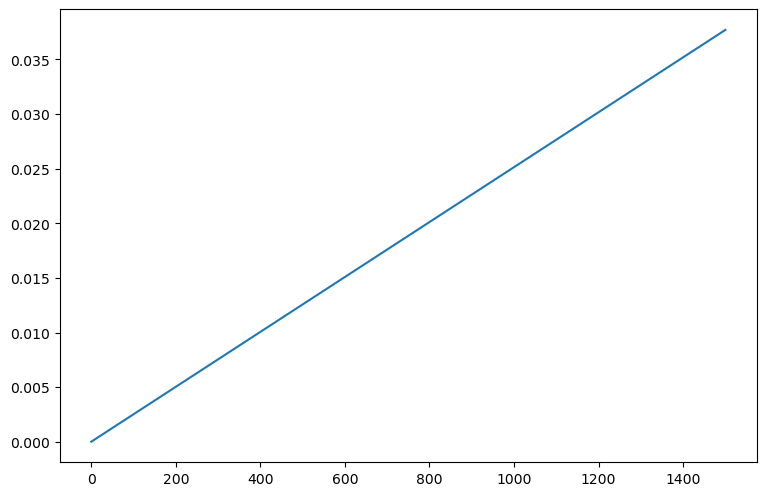

In [55]:
plt.plot(dA)

In [74]:
g_r = np.zeros(len(bins))
areas = np.zeros(len(bins))

for i, atom1 in enumerate(coord):
    """calculate the area of the cut circular shell"""
    for j in range(len(bins)):
        r1 = j * binwidth
        r2 = r1 + binwidth
        a1 = area(r1)
        a2 = area(r2)
        areas[j] += a2 - a1
        
    """loop over pairs of atoms, each pair counts as 2"""
    for atom2 in coord[i:]:
        dist = distance(atom1, atom2, BOX)
        index = int(dist / binwidth)
        if 0 < index < len(bins):
            g_r[index] += 2.0
    
for i, value in enumerate(g_r):
    g_r[i] = value * Area_per_particle / areas[i] 

In [86]:
g_r = np.zeros(len(bins))
areas = np.zeros(len(bins))

for i, atom1 in enumerate(coord):
    """calculate the area of the cut circular shell"""
    # for j in range(len(bins)):
    #    r1 = j * binwidth
    #    r2 = r1 + binwidth
    #    a1 = area(r1)
    #    a2 = area(r2)
    #    areas[j] += a2 - a1
        
    """loop over pairs of atoms, each pair counts as 2"""
    for atom2 in coord[i:]:
        dist = PBC_distance(atom1, atom2, BOX)
        index = int(dist / binwidth)
        if 0 < index < len(bins):
            g_r[index] += 2.0
    
for i, value in enumerate(g_r):
    g_r[i] = value * Area_per_particle / dA[i] / Nparticle

In [87]:
areas

array([0., 0., 0., ..., 0., 0., 0.])

In [88]:
dA * Nparticle

array([1.25663706e-02, 3.76991118e-02, 6.28318531e-02, ...,
       3.76614127e+01, 3.76865455e+01, 3.77116782e+01])

In [89]:
areas / dA

array([0., 0., 0., ..., 0., 0., 0.])

In [70]:
coord[0]

array([2.95521703, 2.47546407])

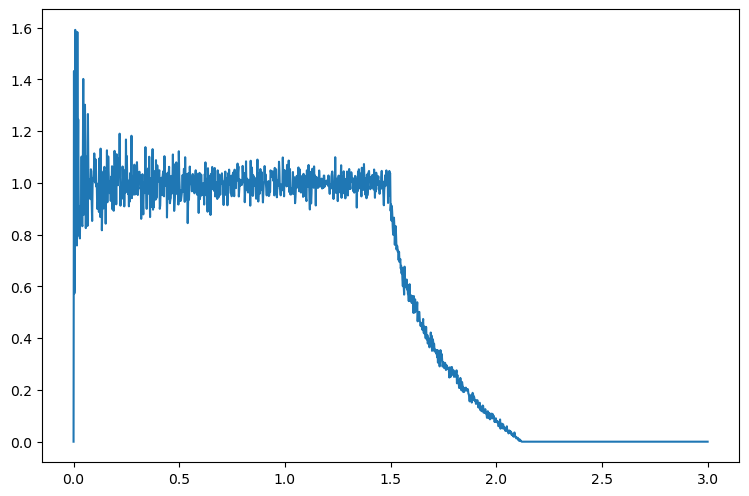

In [78]:
plt.plot(bins, g_r)

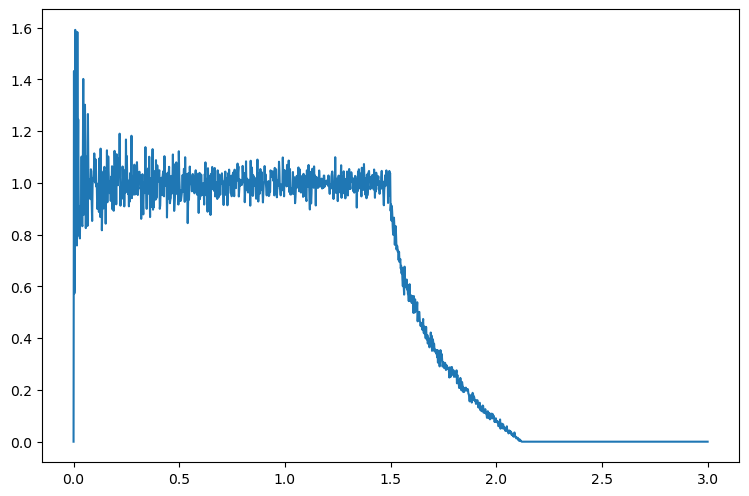

In [90]:
plt.plot(bins, g_r)